# Spam Message classification

### 1) Data Processing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('25152746-spam.tsv',sep='\t')

In [3]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [4]:
df.isna().sum()

label      0
message    0
length     0
punct      0
dtype: int64

It will return True or False. Since there is no true, it means our dataset is complete. Meaning = there is no missing value in our dataset.

In [5]:
df.tail()

,label,message,length,punct
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1
5571,ham,Rofl. Its true to its name,26,1


In [6]:
df.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


In [7]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [8]:
df['label'].value_counts() * 100 /(len(df))

ham     86.593683
spam    13.406317
Name: label, dtype: float64

In [9]:
ham = df[df['label'] == 'ham']
spam = df[df['label'] == 'spam']

In [10]:
ham = ham.sample(spam.shape[0])

In [11]:
ham.shape, spam.shape

((747, 4), (747, 4))

In [12]:
data = ham.append(spam, ignore_index=True)

In [13]:
data.shape

(1494, 4)

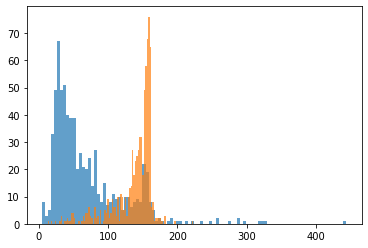

In [14]:
plt.hist(data[data['label'] == 'ham'] ['length'], bins=100, alpha=0.7)
plt.hist(data[data['label'] == 'spam'] ['length'], bins=100, alpha=0.7)
plt.show()

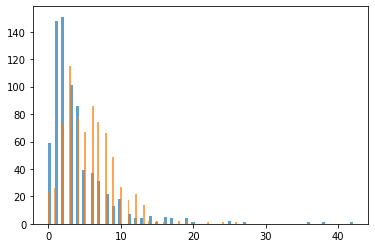

In [15]:
plt.hist(data[data['label'] == 'ham'] ['punct'], bins=100, alpha=0.7)
plt.hist(data[data['label'] == 'spam'] ['punct'], bins=100, alpha=0.7)
plt.show()

### Split Data into Training & Testing

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(data['message'], data['label'], test_size=0.3, random_state=0,shuffle=True)

In [18]:
X_train.shape

(1045,)

In [19]:
X_test.shape

(449,)

## 2) Building the model (Random Forest)

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline

In [23]:
classifier = Pipeline([("tfidf", TfidfVectorizer()), ("classifier", RandomForestClassifier(n_estimators=100))])

In [24]:
classifier.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier())])

## 3) Predicting the results (Random Forest)

In [25]:
y_pred = classifier.predict(X_test)

In [26]:
y_test, y_pred

(799     spam
 1047    spam
 1436    spam
 54       ham
 793     spam
         ... 
 824     spam
 822     spam
 644      ham
 1034    spam
 1356    spam
 Name: label, Length: 449, dtype: object,
 array(['spam', 'spam', 'spam', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
        'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam', 'spam', 'ham',
        'ham', 'spam', 'spam', 'ham', 'spam', 'spam', 'ham', 'spam', 'ham',
        'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam', 'spam',
        'spam', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'spam', 'ham',
        'ham', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham',
        'spam', 'spam', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham',
        'ham', 'spam', 'spam', 'ham', 'ham', 'ham', 'spam', 'spam', 'spam',
        'spam', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
        'spam', 'ham', 'ham', 'ham', 'ham', 'spam', 'spam', 'ham', 'spam',
        'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam',

In [27]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [28]:
accuracy_score(y_test, y_pred)

0.9510022271714922

In [29]:
0.9510022271714922 * 449

427.0

In [30]:
confusion_matrix(y_test, y_pred)

array([[226,   1],
       [ 21, 201]])

In [31]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.91      1.00      0.95       227
        spam       1.00      0.91      0.95       222

    accuracy                           0.95       449
   macro avg       0.96      0.95      0.95       449
weighted avg       0.95      0.95      0.95       449



## 4) Building the model (SVM)

In [32]:
from sklearn.svm import SVC

In [ ]:
classifier = Pipeline([("tfidf", TfidfVectorizer()), ("classifier", (n_estimators=100))])